In [1]:
import numpy as np
from statsmodels.nonparametric.kde import KDEUnivariate
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../mutationalsignature/')
from file.file.vcf import read_vcf
from plot.plot.plot import plot_points

%matplotlib inline

In [2]:
VCF_FILE_PATH = '../../../../apobec/results/vcfs/qual50_dp100/TRF008540.sorted.bam.freebayes.vcf.gz.qual50_dp100.vcf.gz'

In [3]:
vcf_dict = read_vcf(VCF_FILE_PATH)
chromosome_groups = vcf_dict['data'].groupby('CHROM')

Not parsing: VCFv4.1.
Not parsing: 20170414.
Not parsing: freeBayes v1.0.2.
Not parsing: /home/hyeerna/Jumis/data/grch/hg19.fa.
Not parsing: none.
Not parsing: "freebayes -f /home/hyeerna/Jumis/data/grch/hg19.fa /home/hyeerna/Jumis/nbpackage/data/TRF008540.sorted.bam".
Not parsing: 1.4+htslib-1.4.
Not parsing: view -i '50<QUAL & 100<DP' /home/hyeerna/Jumis/nbpackage/results/TRF008540.sorted.bam.freebayes.vcf.gz; Date=Tue Apr 18 14:57:51 2017.


chr1


ValueError: Unrecognized marker style #20D9BA

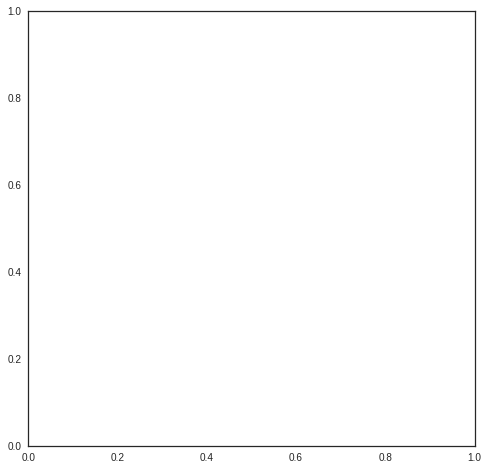

In [4]:
sns.set_style('white')
for chromosome, df in chromosome_groups:
    print(chromosome)
    
    if '_' in chromosome:
        continue

    x = np.array(df['POS'], dtype='float')

    kde = KDEUnivariate(x)
    kde.fit(bw=10000.0)
    
    plot_points(kde.support, kde.density, linestyle='-', title=chromosome)
    plt.show()